In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
from sklearn.cluster import KMeans
wcss = []  #wcss- within cluster sum of squares--- sum of squared dist. btw. each pt. to its centroid
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++")
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)

C:\Users\Kaushika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


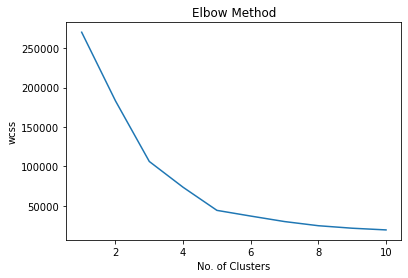

In [11]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

In [13]:
km = KMeans(n_clusters = 5)
km.fit(df.iloc[:,3:])
y_pred = km.predict(df.iloc[:,3:])
df["cluster"] = y_pred
df0 = df[df["cluster"]==0]
df1 = df[df["cluster"]==1]
df2 = df[df["cluster"]==2]
df3 = df[df["cluster"]==3]
df4 = df[df["cluster"]==4]

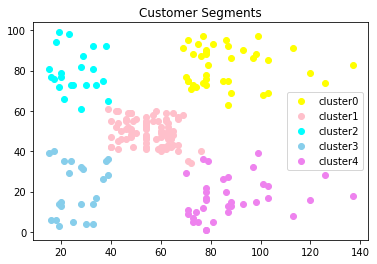

In [25]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],c="yellow",label="cluster0")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c="pink",label="cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],c="cyan",label="cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],c="skyblue",label="cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],c="violet",label="cluster4")
plt.legend()
plt.title("Customer Segments")
plt.show()